First, I used tinytim to create PSF for HST WFC3 IR f160w filter.
I attached two pictures below to show you the input to tinytim I used and the program response



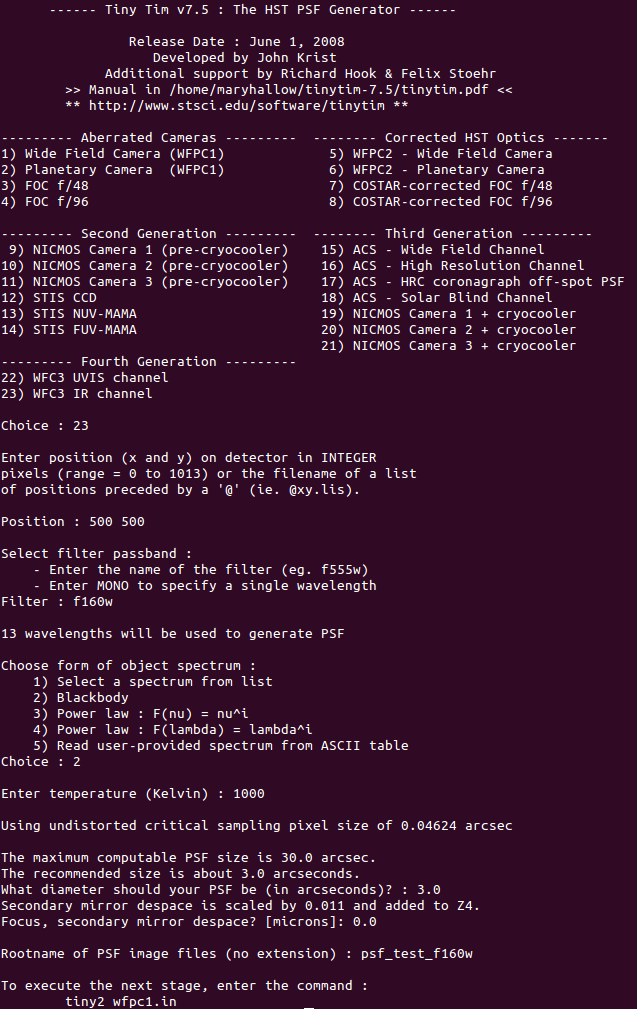

In [32]:
from IPython.core.display import Image
print('First, I used tinytim to create PSF for HST WFC3 IR f160w filter.')
print('I attached two pictures below to show you the input to tinytim I used and the program response\n')

Image(filename="pic1.png")

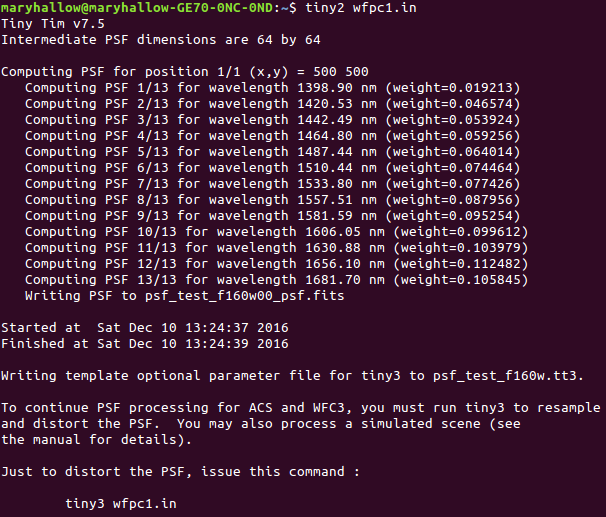

In [28]:
Image(filename="pic2.png")

In [41]:
print('Second, the program tells us that it made the mesh with pixel size = 0.04624 arcsec.')
print('Actual HST WFC3 IR CAM pixel size equals to 0.13 arcsec, therefore, the PSF image created')
print('by tinytim is oversampled and we have to smooth it.\n')

Second, the program tells us that it made the mesh with pixel size = 0.04624 arcsec.
Actual HST WFC3 IR CAM pixel size equals to 0.13 arcsec, therefore, the PSF image created
by tinytim is oversampled and we have to smooth it.



In [1]:
%matplotlib notebook

import numpy              as np
import matplotlib.pyplot  as plt
import glob
from scipy                import interpolate
from scipy                import integrate
from scipy                import signal
from astropy.io           import fits
from scipy                import stats

In [39]:
psf_mtrx = fits.open('psf_test_f160w00_psf.fits')[0].data
nbins_oversampled = np.shape(psf_mtrx)[0]

ang_coords = np.linspace(-1.5+1.5/nbins_oversampled,1.5-1.5/nbins_oversampled,nbins_oversampled)
nbins = int(3/0.13)
pix_edges  = np.linspace(-1.5,1.5,nbins+1)

x, y = np.meshgrid(ang_coords, ang_coords)
psf_f160w,X,Y =np.histogram2d(x.flatten(), y.flatten(), bins=(pix_edges, pix_edges), weights = psf_mtrx.flatten())

print(np.shape(psf_mtrx)[0]*0.04624)
print(np.shape(psf_f160w)[0]*0.13)


2.95936
2.99


<IPython.core.display.Javascript object>


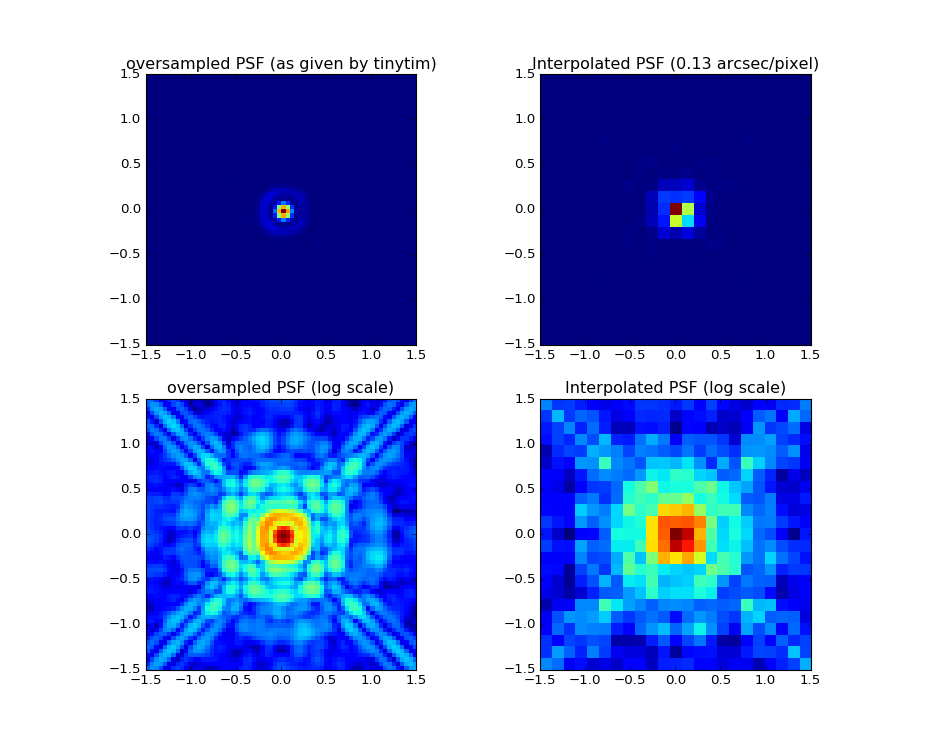

In [8]:
plt.figure(1)
plt.subplot(2,2,1)
plt.title('oversampled PSF (as given by tinytim)')
plt.imshow(psf_mtrx,interpolation='nearest', extent=[-1.5,1.5,-1.5,1.5])
plt.subplot(2,2,2)
plt.title('Interpolated PSF (0.13 arcsec/pixel)')
plt.imshow(psf_f160w,interpolation='nearest', extent=[-1.5,1.5,-1.5,1.5])
plt.subplot(2,2,3)
plt.title('oversampled PSF (log scale)')
plt.imshow(np.log10(psf_mtrx),interpolation='nearest', extent=[-1.5,1.5,-1.5,1.5])
plt.subplot(2,2,4)
plt.title('Interpolated PSF (log scale)')
plt.imshow(np.log10(psf_f160w),interpolation='nearest', extent=[-1.5,1.5,-1.5,1.5])

plt.show()


In [42]:
print('How the images with such choice of PSF would look like?')

How the images with such choice of PSF would look like?


In [51]:
from IPython.display import IFrame
IFrame("fig_f160w_1.pdf",width=1000,height=1000)

In [52]:
print('same image but in log-scale')
IFrame("fig_f160w_4.pdf",width=1000,height=1000)

same image but in log-scale


In [53]:
print('in noise std units (red color refers to sigma>=5)')
IFrame("fig_f160w_3.pdf",width=1000,height=1000)

in noise std units (red color refers to sigma>=5)
